In [1]:
#WRIte brief about NLP
#NLP is the technology use by machines to unerstand, analyise, manipulate & interpret human languages.
#synrax an semantic Analysis are two main techniques with NLP

In [2]:
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

In [5]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [16]:
#drop the unnecessary columns
df.drop(['job_id','telecommuting', 'has_company_logo', 'has_questions', 'employment_type'], axis=1, inplace=True)
df.head()

KeyError: "['job_id' 'telecommuting' 'has_company_logo' 'has_questions'\n 'employment_type'] not found in axis"

In [17]:
df.isnull().sum()

title                      0
location                 346
department             11547
company_profile         3308
description                1
requirements            2695
benefits                7210
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
#salary_range has the highest null values. Drop this column since it wont be helpful in future preiction
df.drop(["salary_range"], axis= 1, inplace=True)
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [44]:
df.shape

(17880, 13)

In [9]:
# Since department  and others variables also has null values but we arent going to drop it since it is helpful for our preiction
# Hence fill these null values with a ""(blank)

In [18]:
df.fillna("", inplace=True)
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [21]:
#Get the count
df["fraudulent"].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

#### check the  fradulent and non-fraulent job postings using countplot

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


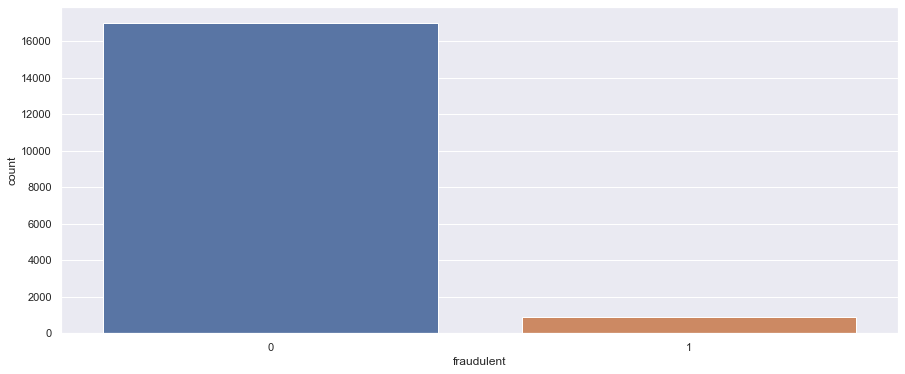

In [19]:
#Plot the count
plt.figure(figsize=(15,6))
sns.set_theme(style="darkgrid")
sns.countplot(df["fraudulent"])
plt.show()

#### Analyse the  required experience for job posting

In [41]:
exp = dict(df["required_experience"].value_counts())
exp

{'': 7050,
 'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

In [24]:
del exp[""]
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

In [28]:
exp.keys(), exp.values()

(dict_keys(['Mid-Senior level', 'Entry level', 'Associate', 'Not Applicable', 'Director', 'Internship', 'Executive']),
 dict_values([3809, 2697, 2297, 1116, 389, 381, 141]))

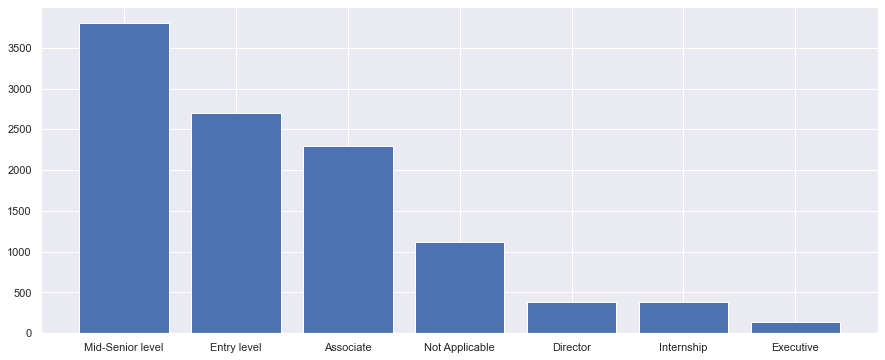

In [32]:
#Plot this in a countplot to visualise it with keys as x-axis and its values as y-axis
plt.figure(figsize=(15,6))
sns.set_theme(style="darkgrid")
plt.bar(exp.keys(), exp.values())
plt.show()

In [33]:
#Split the location column and extract only the country
df["country"] = df.location.str.split(',').str[0]
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [40]:
#Top 12 countries for job posting
country = dict(df["country"].value_counts()[:12])
del country[""]
country

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117}

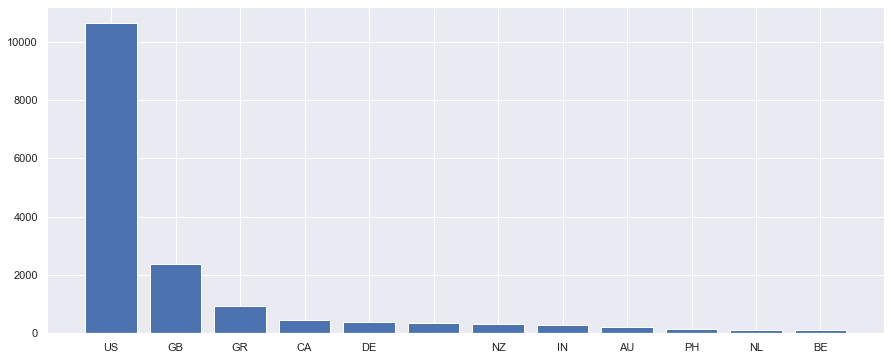

In [39]:
#Plot this in a countplot to visualise it with its keys as x-axis and its values as y-axis
plt.figure(figsize=(15,6))
sns.set_theme(style="darkgrid")
plt.bar(country.keys(), country.values())
plt.show()

In [ ]:
#the maximum number of job posted were from US

In [45]:
df.shape

(17880, 13)

In [55]:
edu = dict(df["required_education"].value_counts())
del edu[""]
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170,
 'Some College Coursework Completed': 102,
 'Professional': 74,
 'Vocational': 49,
 'Some High School Coursework': 27,
 'Doctorate': 26,
 'Vocational - HS Diploma': 9,
 'Vocational - Degree': 6}

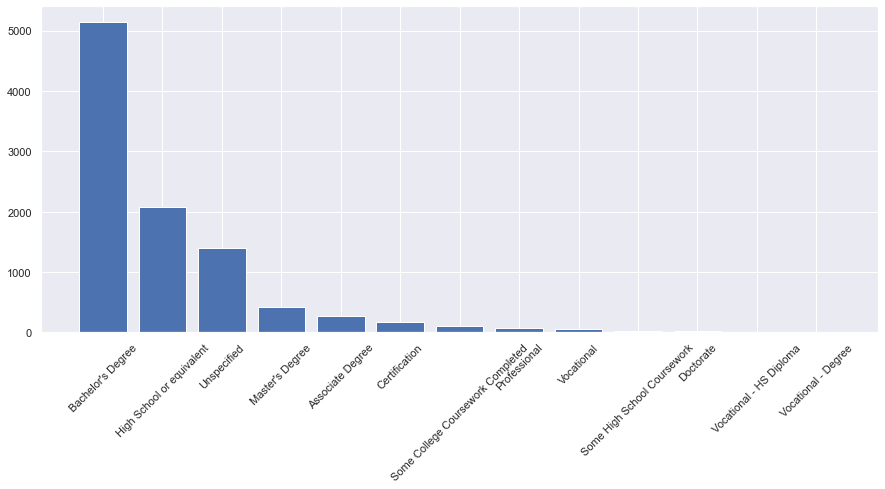

In [54]:
#Plot this in a countplot to visualise it clearly
plt.figure(figsize=(15,6))
sns.set_theme(style="darkgrid")
plt.bar(edu.keys(), edu.values())
plt.xticks(rotation= 45)
plt.show()

#### Titles of the jobs that were not fradulent

In [69]:
df[df["fraudulent"]== 0].title.value_counts()[:10]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64

#### Titles of the jobs that were fradulent

In [74]:
df[df["fraudulent"]==1].title.value_counts()[:10]

Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Data Entry Admin/Clerical Positions - Work From Home                    21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Name: title, dtype: int64

In [75]:
df.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'country'],
      dtype='object')

In [76]:
#combine all the remaining columns as text

In [77]:
df["text"] = df["title"]+" " +df["company_profile"]+" "+ df["description"]+" "+df["requirements"]+" "+df["benefits"]
df["text"]

0        Marketing Intern We're Food52, and we've creat...
1        Customer Service - Cloud Video Production 90 S...
2        Commissioning Machinery Assistant (CMA) Valor ...
3        Account Executive - Washington DC Our passion ...
4        Bill Review Manager SpotSource Solutions LLC i...
                               ...                        
17875    Account Director - Distribution  Vend is looki...
17876    Payroll Accountant WebLinc is the e-commerce p...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer  Nemsia Studios is looking fo...
17879    Web Application Developers Vend is looking for...
Name: text, Length: 17880, dtype: object

In [81]:
df1 = pd.DataFrame(df["text"])
df1["fraudulent"] = df["fraudulent"]

In [82]:
df1

,text,fraudulent
0,"Marketing Intern We're Food52, and we've creat...",0
1,Customer Service - Cloud Video Production 90 S...,0
2,Commissioning Machinery Assistant (CMA) Valor ...,0
3,Account Executive - Washington DC Our passion ...,0
4,Bill Review Manager SpotSource Solutions LLC i...,0
...,...,...
17875,Account Director - Distribution Vend is looki...,0
17876,Payroll Accountant WebLinc is the e-commerce p...,0
17877,Project Cost Control Staff Engineer - Cost Con...,0
17878,Graphic Designer Nemsia Studios is looking fo...,0


#### create a wordcloud based on text for fraudulent & non-fraudulent  jobs

In [89]:
fraud_jobs_text = df1[df1["fraudulent"]==1].text
real_jobs_text = df1[df1["fraudulent"]==0].text

In [91]:
#import the necessery library
from wordcloud import WordCloud, STOPWORDS